# Simple Human Skin Detection
---
Simple non-ML model for human skin detection with application of:
* **RGB, HSV, YCrCb intervals**
* **color dependencies**

Implementation of [human skin detection algorithm](https://arxiv.org/pdf/1708.02694.pdf).

In [1]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from src.visualize import show_images

In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 

In [3]:
def rgb_to_hsv(r, g, b):
    maxc = max(r, g, b)
    minc = min(r, g, b)
    v = maxc
    if minc == maxc:
        return 0.0, 0.0, v
    s = (maxc-minc) / maxc
    rc = (maxc-r) / (maxc-minc)
    gc = (maxc-g) / (maxc-minc)
    bc = (maxc-b) / (maxc-minc)
    if r == maxc:
        h = bc-gc
    elif g == maxc:
        h = 2.0+rc-bc
    else:
        h = 4.0+gc-rc
    h = (h/6.0) % 1.0
    return h, s, v

def rgb_to_ycbcr(r, g, b):
    y = np.trunc((0.257 * r) + (0.504 * g) + (0.098 * b) + 16)
    cb = np.trunc(((-0.148) * r) - (0.291 * g) + (0.439 * b) + 128)
    cr = np.trunc((0.439 * r) - (0.368 * g) - (0.071 * b) + 128)
    return y, cb, cr

Detection function.

In [4]:
def detect(image, return_array=False):
    img = np.array(image)
    image_mask = np.zeros(img.shape, dtype=np.uint8)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            
            r, g, b = img[i][j]
            y, cr, cb = rgb_to_ycbcr(r, g, b)
            h, s, v = rgb_to_hsv(r, g, b)
            cond0 = 0. <= h <= 50.0 and 0.23 <= s <= 0.68 and\
                    r > 95 and g > 40 and b > 20 and r > g and r > b and\
                    r - g > 15
            cond1 = r > 95 and g > 40 and b > 20 and r > g and r > b and\
                    r - g > 15  and cr > 135 and\
                    cb > 85 and y > 80 and\
                    cr <= 1.5862*cb+20 and\
                    cr >= 0.3448*cb+76.2069 and\
                    cr >= -4.5652*cb+234.5652 and\
                    cr <= -1.15*cb+301.75 and\
                    cr <= -2.2857*cb+432.85
            if cond0 or cond1:
                image_mask[i][j] = [255, 255, 255]
    
    if return_array:
        return image_mask
    
    pred_img = Image.fromarray(image_mask)
    return pred_img

Example

In [5]:
img1 = Image.open('skin_color_images/faces/face0.png')
skn1 = Image.open('skin_color_images/faces_gt/face0.png')
det1 = detect(img1)

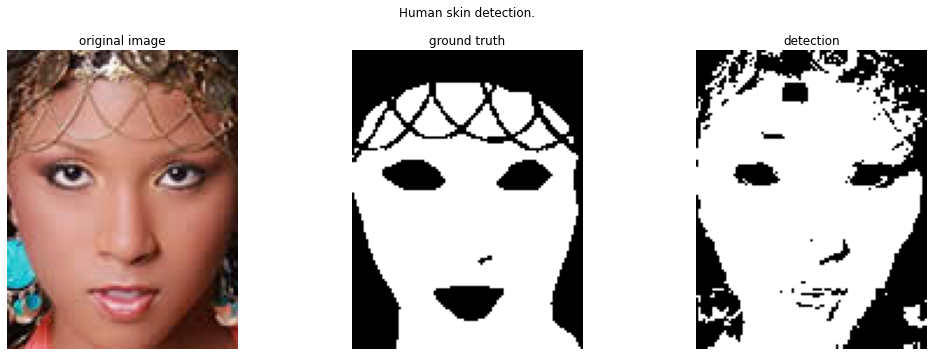

In [6]:
show_images([img1, skn1, det1], ['original image', 'ground truth', 'detection'],
            suptitle='Human skin detection.')

In [7]:
img2 = Image.open('detected_faces/face4315.png')
det2 = detect(img2)

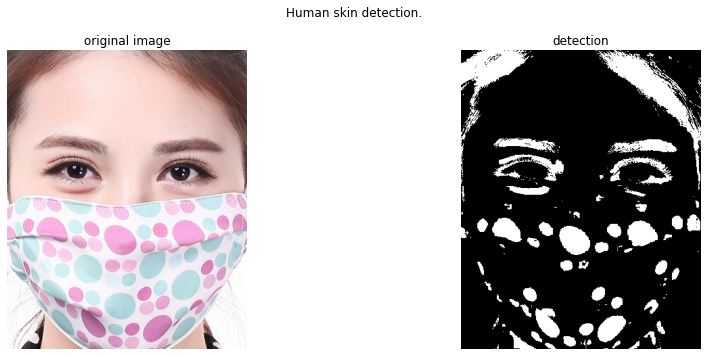

In [8]:
show_images([img2, det2], ['original image', 'detection'],
            suptitle='Human skin detection.')